In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [562]:
# Read file from csv 
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Data Cleaning and Preprocessing

In [563]:
print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [565]:
print(df.shape)

(243, 15)


In [566]:
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [567]:
print(df.describe())

              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

In [568]:
#  Dataset doesn't have any null values
print(df.isna().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [569]:
# Checking unique values for column 'Classes'
print('Checking how many unique values for column Classes\n')
print(df['Classes'].value_counts())             # there are 8 unique categories

Checking how many unique values for column Classes

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


In [570]:
print('Remove leading and trailing spaces\n')
# Remove leading and trailing spaces
df['Classes'] = df['Classes'].str.strip()

# Rechecking for unique values
print(df['Classes'].value_counts()) # Now there are only 2 unique values

Remove leading and trailing spaces

Classes
fire        137
not fire    106
Name: count, dtype: int64


In [571]:
print('Convert categorical values to numerical\n')
# Convert categorical values  to numerical (1 and 0)
df['Classes'] = df['Classes'].replace({'fire':1,'not fire':0})
print(df['Classes'].value_counts())

Convert categorical values to numerical

Classes
1    137
0    106
Name: count, dtype: int64


In [572]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


# Data Visualization and Observations

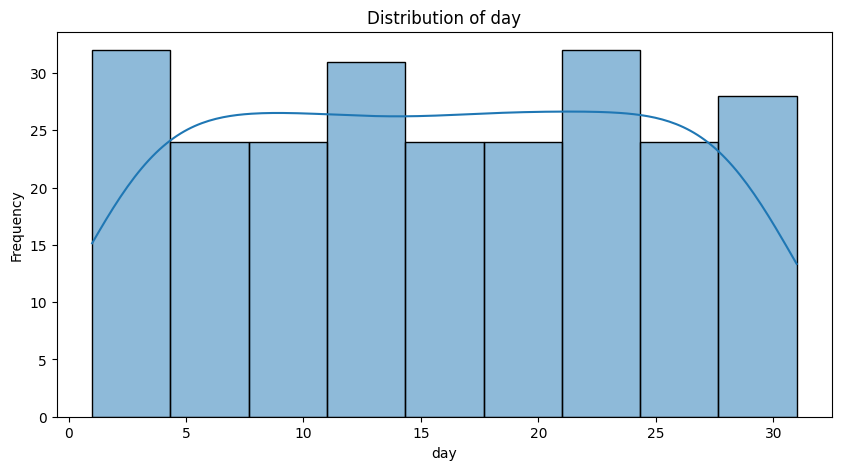

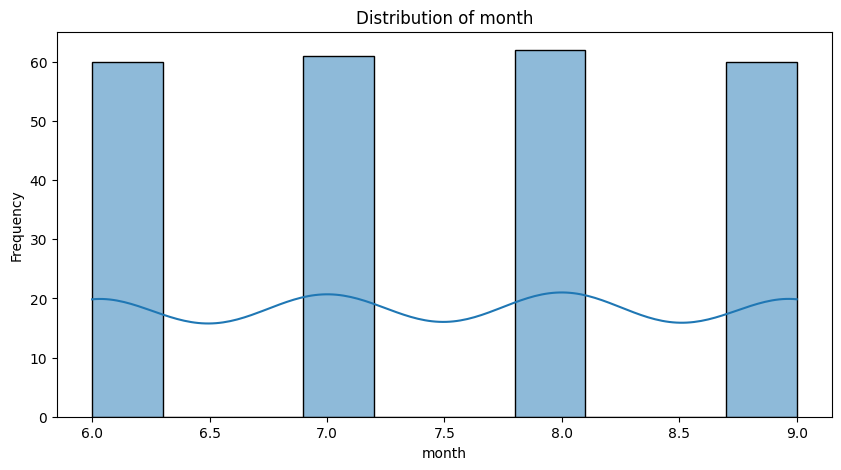

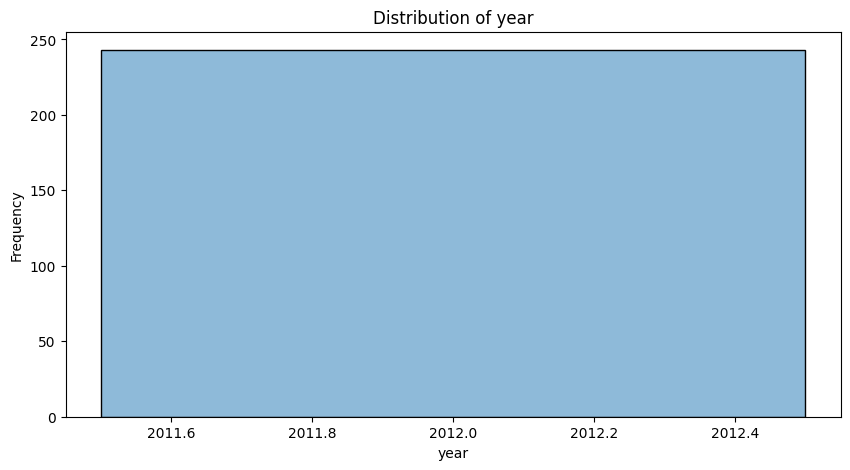

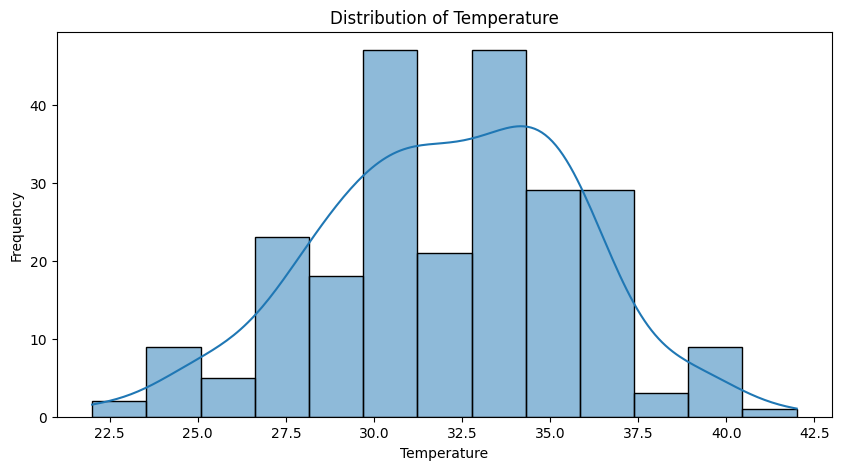

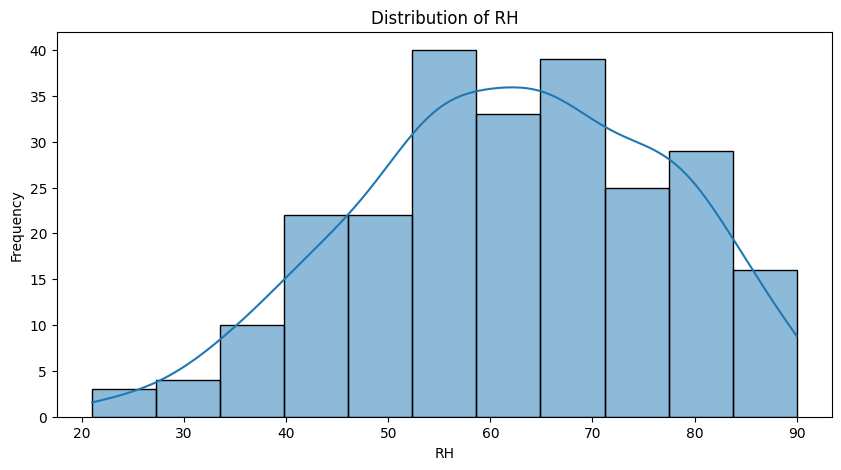

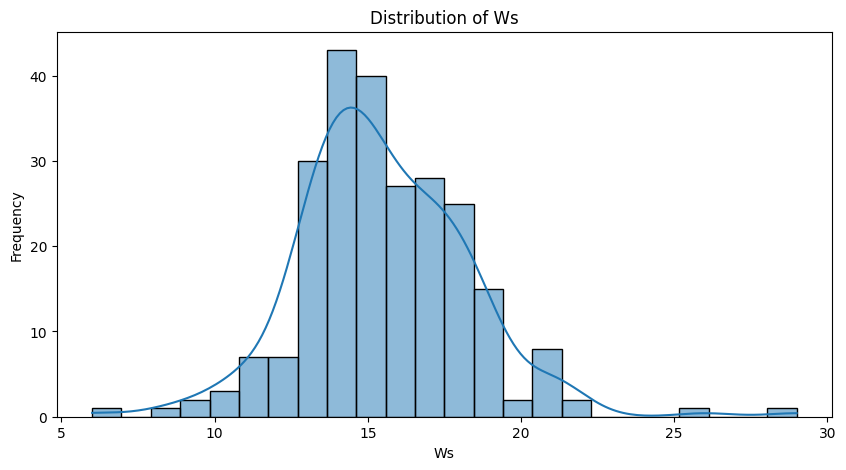

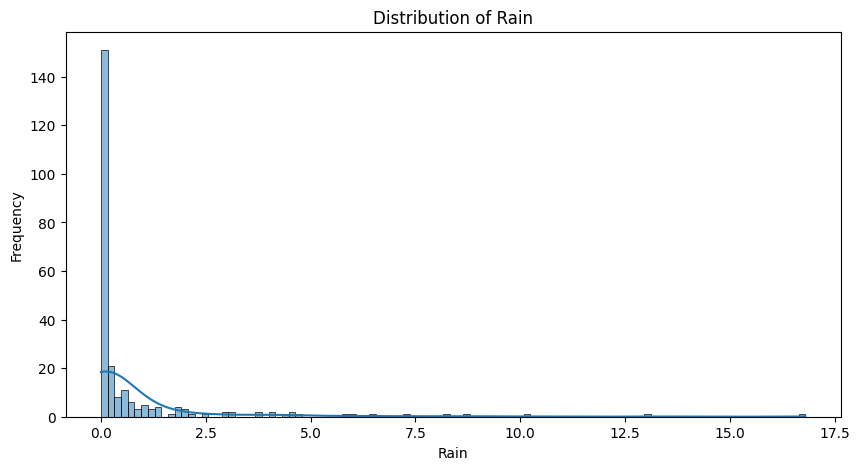

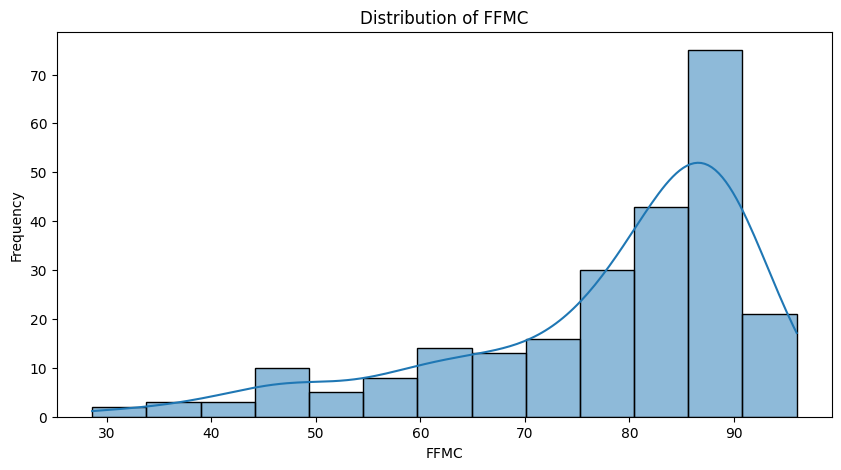

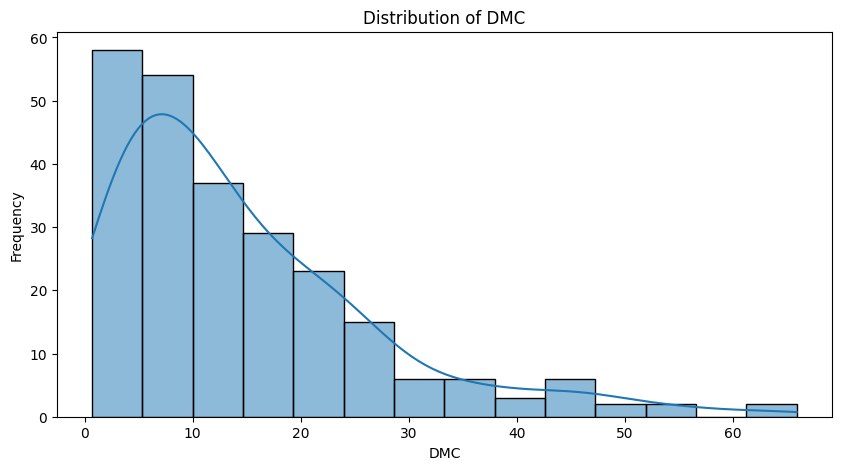

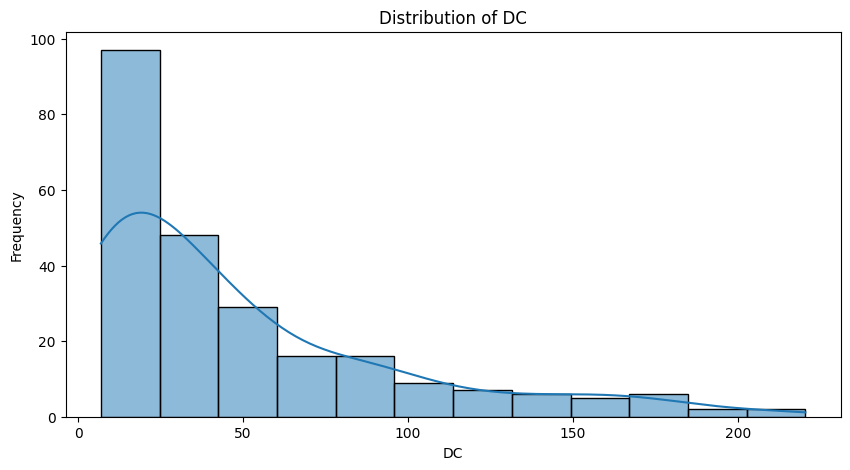

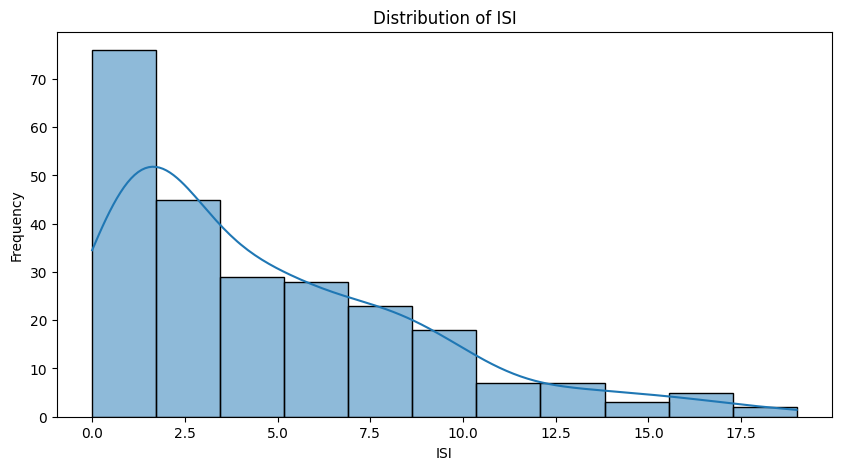

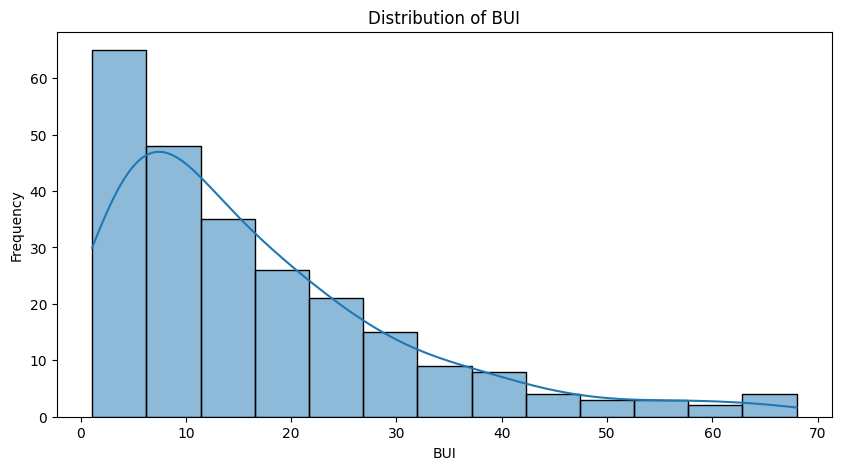

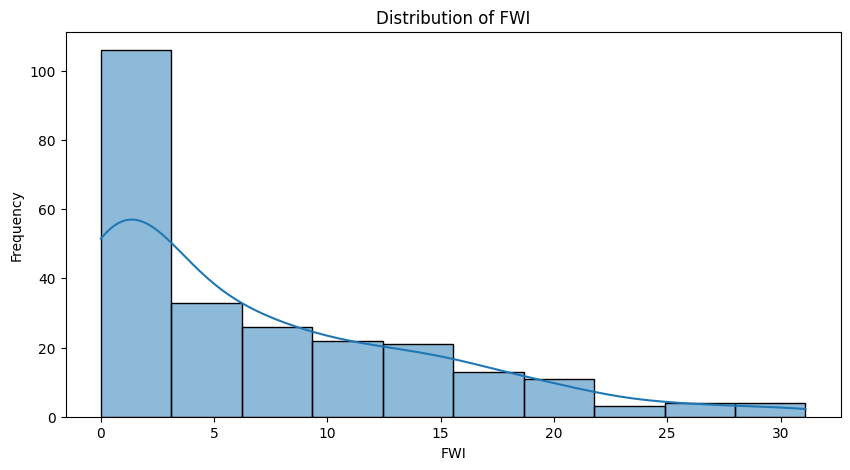

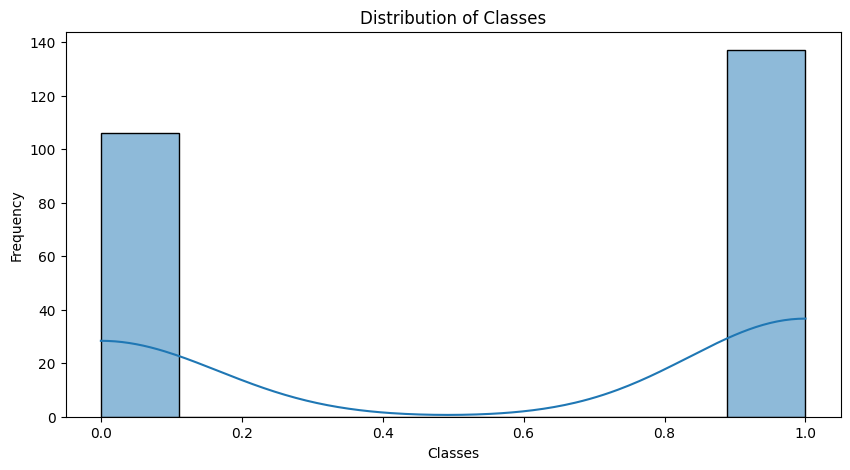

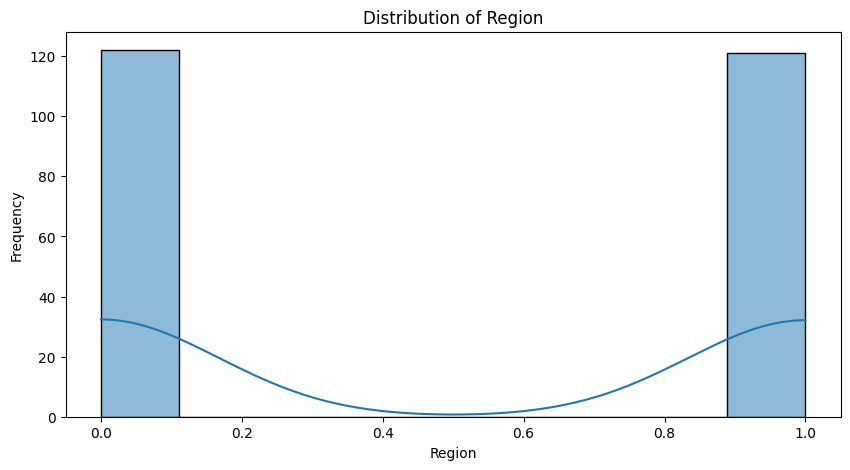

In [573]:
# Univariate analysis using histplot and kdeplot
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Classes
Fire        137
Not Fire    106
Name: count, dtype: int64


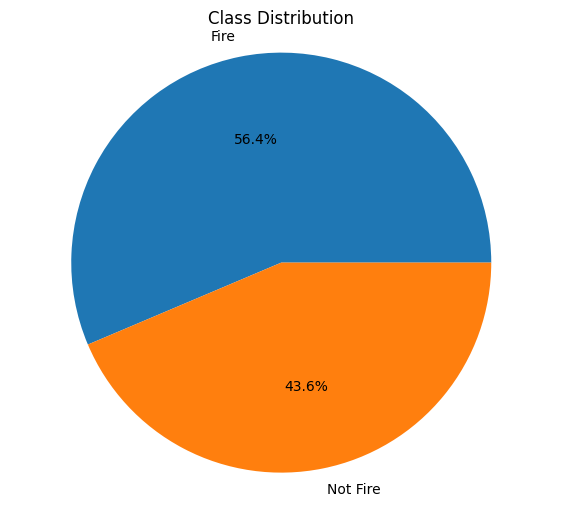

In [574]:
# Map numerical class labels to descriptive names
Classes = df['Classes'].map({1: 'Fire', 0: 'Not Fire'})

# Count occurrences of each class
class_counts = Classes.value_counts()

# Display the counts of each class
print(class_counts)

# Create a pie chart to visualize class distribution
plt.figure(figsize=(7, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


In [575]:
# ANSI escape codes for text color
YELLOW = "\033[33m"

# Print colored text
print(f"{YELLOW}Conclusion:\nThe pie chart displays the distribution of the 'Fire' and 'Not Fire' classes.\n"
      "The proportions of 'Fire' and 'Not Fire' are roughly equal, indicating that the classes are balanced.")

Conclusion:
The pie chart displays the distribution of the 'Fire' and 'Not Fire' classes.
The proportions of 'Fire' and 'Not Fire' are roughly equal, indicating that the classes are balanced.


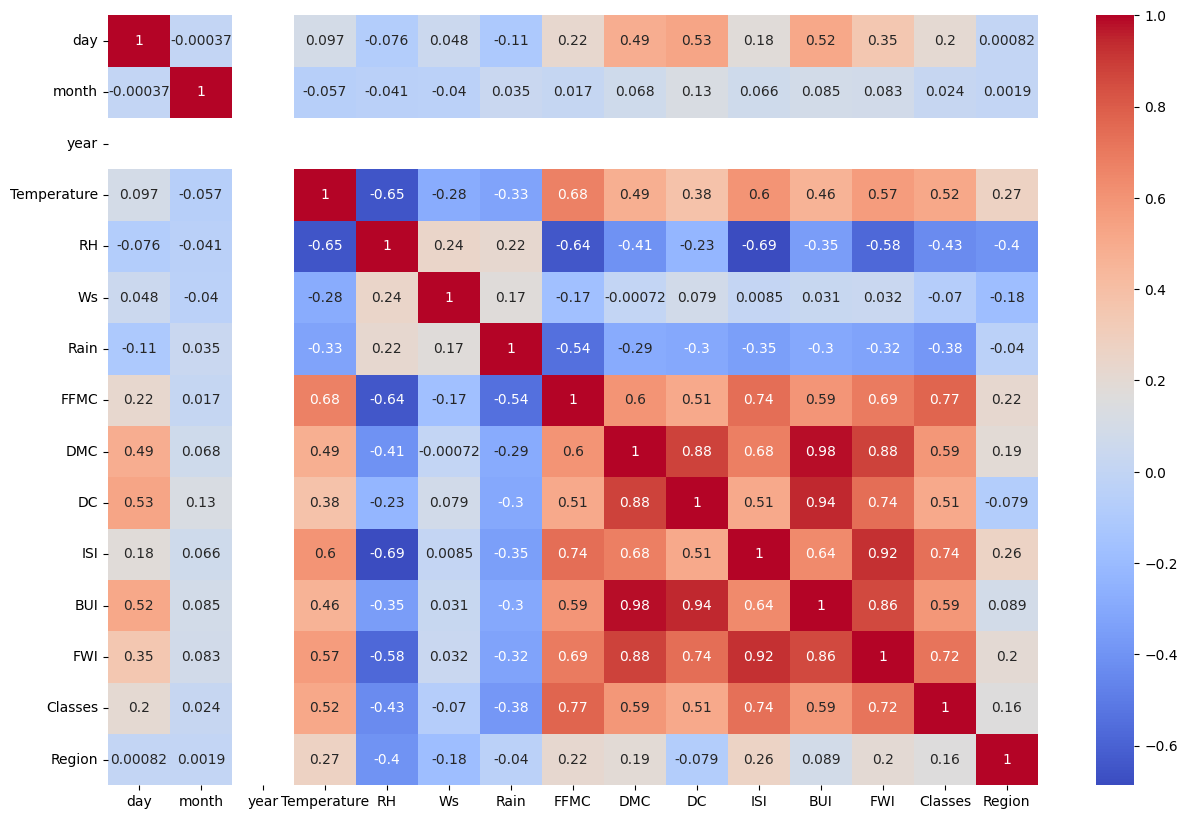

In [576]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [577]:
# Print colored text
print(f"{YELLOW}Drop the 'year' column due to lack of variability, which doesn't contribute meaningful insights.\n"
      "DMC is removed for its high correlation with BUI, reducing redundancy and preventing multicollinearity in the analysis.")

Drop the 'year' column due to lack of variability, which doesn't contribute meaningful insights.
DMC is removed for its high correlation with BUI, reducing redundancy and preventing multicollinearity in the analysis.


In [578]:
# Drop the 'year' column due to lack of variability and DMC for high correlation with BUI
df = df.drop(columns=['year','BUI'])
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int64  
 12  Region       243 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 24.8 KB


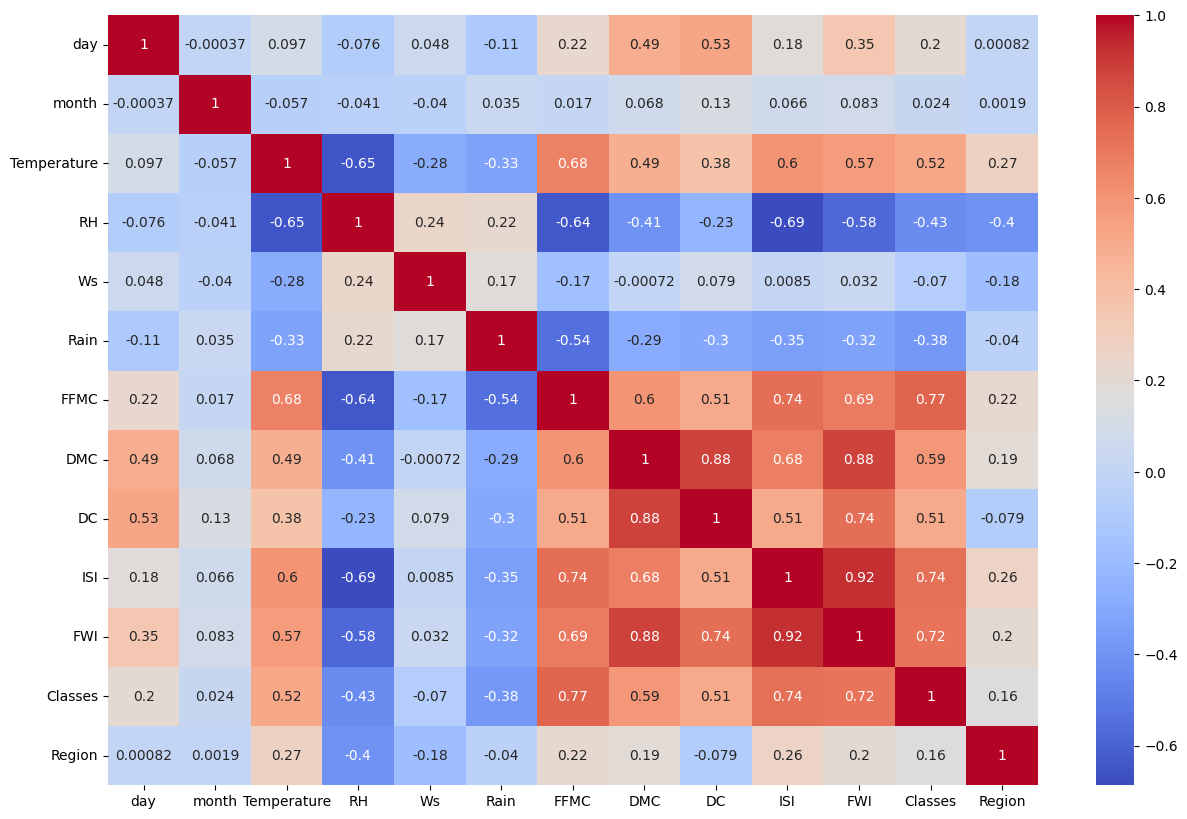

In [579]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

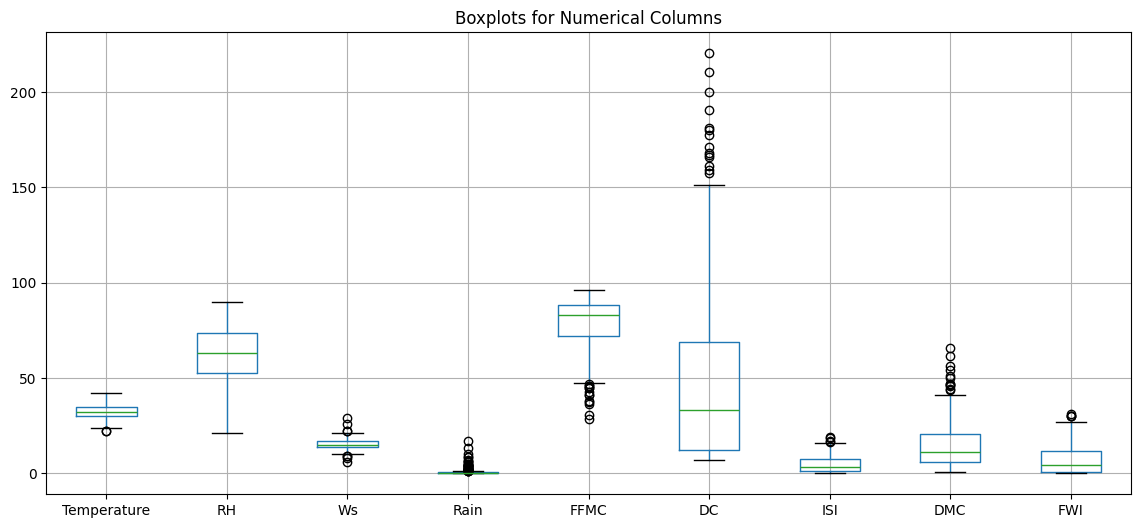

In [580]:
# Create box plots for numerical columns
plt.figure(figsize=(14, 6))
df.boxplot(column=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DC', 'ISI', 'DMC', 'FWI'])
plt.title('Boxplots for Numerical Columns')
plt.show()

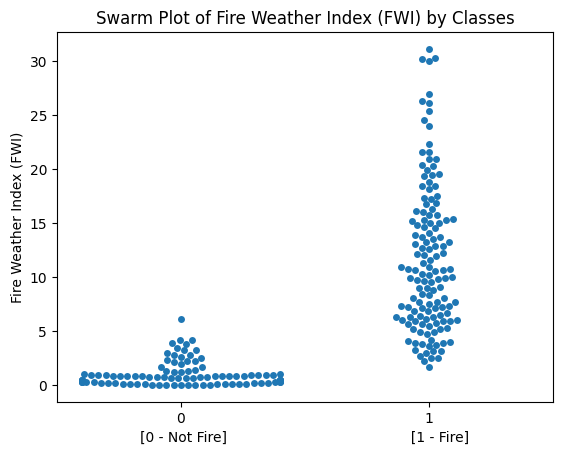

In [581]:
# Swarm plot comparing the Fire Weather Index (FWI) for two classes
sns.swarmplot(x='Classes', y='FWI', data=df)

# Customize the plot
plt.title('Swarm Plot of Fire Weather Index (FWI) by Classes')
plt.xlabel('[0 - Not Fire]                                          [1 - Fire]')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()

In [582]:
# Print colored text
print(f"{YELLOW}The swarm plot shows that for Class 0 (Not Fire), FWI values are generally lower,\n"
      "indicating that the weather conditions are less conducive to fire. In contrast,\n"
      "higher FWI values suggest that these conditions are more favorable for fire activity.")

The swarm plot shows that for Class 0 (Not Fire), FWI values are generally lower,
indicating that the weather conditions are less conducive to fire. In contrast,
higher FWI values suggest that these conditions are more favorable for fire activity.


# Model Development and Analysis

In [583]:
print('Split the data into input and target variable\n')
# split the data into Inputs and a target variable

X=df.drop(['Classes'], axis=1)
y=df['Classes']

print(X.shape)
print(y.shape)

Split the data into input and target variable

(243, 12)
(243,)


In [584]:
# split the input data & target into train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train and Test data shape\n')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Train and Test data shape

(194, 12) (49, 12) (194,) (49,)


In [585]:
# Balance Checks After Splitting
# To ensure that the split maintains the balance between classes
print(y_train.value_counts())
print(y_test.value_counts())

Classes
1    110
0     84
Name: count, dtype: int64
Classes
1    27
0    22
Name: count, dtype: int64


In [586]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_sc=scaler.fit_transform(X_train)
x_test_sc=scaler.transform(X_test)


# Multiple Logistic Regression Model

In [587]:
# import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [588]:
# intiate the object_names for models
lr=LogisticRegression()

# train the model
print("Performance Metrics of Logistic Regression Model")
print()
lr.fit(x_train_sc, y_train)
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc)    # prediction on train_data
y_pred_ts=lr.predict(x_test_sc)     # prediction on test_data
print()

print()
print("="*150)




Performance Metrics of Logistic Regression Model

coefficients [[-0.23185469 -0.08401091  0.09199013  0.20186838 -0.16803478  0.22367505
   2.53724389  0.09201113  0.52525719  2.27882888  1.79897288  0.22343262]]
intercept [1.65504566]




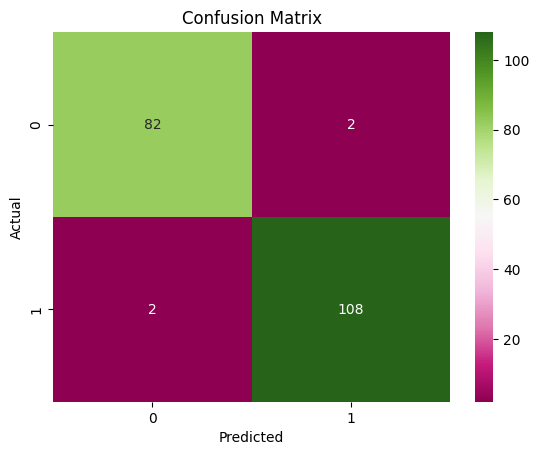

In [589]:
# Compute the confusion matrix
mat = confusion_matrix(y_train,y_pred_tr)

# Create a heatmap with integer format
sns.heatmap(mat, annot=True, fmt='d', cmap='PiYG')

# Show the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


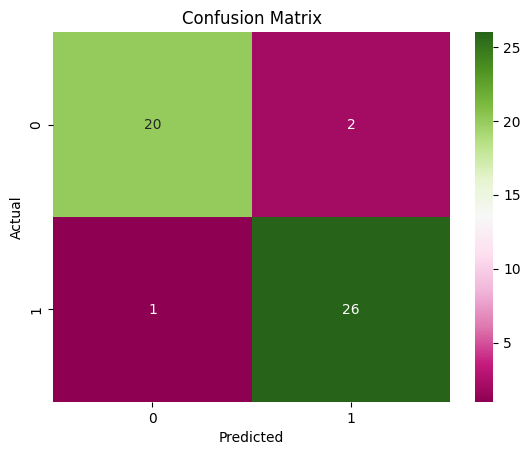

In [590]:
# Compute the confusion matrix
mat = confusion_matrix(y_test,y_pred_ts)

# Create a heatmap with integer format
sns.heatmap(mat, annot=True, fmt='d', cmap='PiYG')

# Show the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [591]:
y_test.value_counts()

Classes
1    27
0    22
Name: count, dtype: int64

In [592]:
# Logistic Regression
print("Performance Metrics of Logistic Regression Model")
print()
print("="*150)
print("Performance Metrics on train data")
print("as_score", accuracy_score(y_train,y_pred_tr))
print("ps_score",precision_score(y_train,y_pred_tr))
print("rs_score",recall_score(y_train,y_pred_tr))
print("f1_score",f1_score(y_train,y_pred_tr))
print()
print("="*150)
print("Performance Metrics on test data")
print("as_score", accuracy_score(y_test,y_pred_ts))
print("ps_score",precision_score(y_test,y_pred_ts))
print("rs_score",recall_score(y_test,y_pred_ts))
print("f1_score",f1_score(y_test,y_pred_ts))

Performance Metrics of Logistic Regression Model

Performance Metrics on train data
as_score 0.979381443298969
ps_score 0.9818181818181818
rs_score 0.9818181818181818
f1_score 0.9818181818181818

Performance Metrics on test data
as_score 0.9387755102040817
ps_score 0.9285714285714286
rs_score 0.9629629629629629
f1_score 0.9454545454545454


In [593]:
# Initiate the object for SVM model
svm = SVC(kernel='linear')  # You can choose 'linear', 'rbf', etc., for different kernels

# Train the model
print("Performance Metrics of SVM Model")
print()
svm.fit(x_train_sc, y_train)

print("coefficients", svm.coef_)
print("intercept", svm.intercept_)

# Predictions
y_pred_tr_svm = svm.predict(x_train_sc)    # Prediction on training data
y_pred_ts_svm = svm.predict(x_test_sc)     # Prediction on test data
print()

print("=" * 150)

Performance Metrics of SVM Model

coefficients [[-0.13107068  0.10412192 -0.03788025 -0.02902071 -0.02477775  0.41363657
   2.06293544 -0.52549674  0.51122926  1.77528557  1.49745746  0.15731905]]
intercept [1.1949393]



In [594]:
# Performance Metrics for SVM
print("Performance Metrics of SVM Model")
print("=" * 150)

# Performance Metrics on train data
print("Performance Metrics on train data")
print("Accuracy Score:", accuracy_score(y_train, y_pred_tr_svm))
print("Precision Score:", precision_score(y_train, y_pred_tr_svm))
print("Recall Score:", recall_score(y_train, y_pred_tr_svm))
print("F1 Score:", f1_score(y_train, y_pred_tr_svm))
print()

print("=" * 150)

# Performance Metrics on test data
print("Performance Metrics on test data")
print("Accuracy Score:", accuracy_score(y_test, y_pred_ts_svm))
print("Precision Score:", precision_score(y_test, y_pred_ts_svm))
print("Recall Score:", recall_score(y_test, y_pred_ts_svm))
print("F1 Score:", f1_score(y_test, y_pred_ts_svm))

Performance Metrics of SVM Model
Performance Metrics on train data
Accuracy Score: 0.9742268041237113
Precision Score: 0.9906542056074766
Recall Score: 0.9636363636363636
F1 Score: 0.9769585253456221

Performance Metrics on test data
Accuracy Score: 0.9591836734693877
Precision Score: 0.9629629629629629
Recall Score: 0.9629629629629629
F1 Score: 0.9629629629629629


In [595]:
# Initiate the Random Forest model
rf = RandomForestClassifier()  # You can specify parameters like n_estimators, max_depth, etc.

# Train the model
rf.fit(x_train_sc, y_train)

# Predictions
y_pred_tr_rf = rf.predict(x_train_sc)    # Prediction on training data
y_pred_ts_rf = rf.predict(x_test_sc)     # Prediction on test data

# Performance Metrics for Random Forest
print("Performance Metrics of Random Forest Model")
print("=" * 150)

# Performance Metrics on train data
print("Performance Metrics on train data")
print("Accuracy Score:", accuracy_score(y_train, y_pred_tr_rf))
print("Precision Score:", precision_score(y_train, y_pred_tr_rf))
print("Recall Score:", recall_score(y_train, y_pred_tr_rf))
print("F1 Score:", f1_score(y_train, y_pred_tr_rf))
print()

print("=" * 150)

# Performance Metrics on test data
print("Performance Metrics on test data")
print("Accuracy Score:", accuracy_score(y_test, y_pred_ts_rf))
print("Precision Score:", precision_score(y_test, y_pred_ts_rf))
print("Recall Score:", recall_score(y_test, y_pred_ts_rf))
print("F1 Score:", f1_score(y_test, y_pred_ts_rf))

Performance Metrics of Random Forest Model
Performance Metrics on train data
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0

Performance Metrics on test data
Accuracy Score: 0.9795918367346939
Precision Score: 1.0
Recall Score: 0.9629629629629629
F1 Score: 0.9811320754716981


# Cross-validation and Hyperparameter Tuning

In [596]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [597]:
# Define the parameter grid
param_grid = [
    {
        'model': [LogisticRegression()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['lbfgs', 'liblinear', 'saga']
    },
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [10, 50, 100, 200],
        'model__max_depth': [1, 2, 3, 4, 5, 10],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 4, 5]
    }
]

In [598]:
# Create a pipeline that includes a placeholder for the model
pipeline = Pipeline([
    ('model', LogisticRegression())  # Placeholder; actual model will be set in the grid search
])


In [599]:
# Create the GridSearchCV object
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=3)

In [600]:
# Fit the grid search on the training data
grid.fit(x_train_sc, y_train) # train the model

Fitting 5 folds for each of 438 candidates, totalling 2190 fits
[CV 1/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5] END model=LogisticRegression(), model__C=0.01, model__penalty=l1, model__solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5] END model=LogisticRegression(), m

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()],
                          'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__penalty': ['l1', 'l2'],
                          'model__solver': ['lbfgs', 'liblinear', 'saga']},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf', 'poly']},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [1, 2, 3, 4, 5, 10],
                          'model__min_samples_leaf': [1, 2, 4, 5],
                          'model__min_samples_split': [2, 5, 10, 20],
                          'model__n_estimators': [10, 50, 100, 200]}],
             scoring='f1', verbose=3)

In [601]:
print(grid.best_params_)
print(grid.best_score_)

{'model': RandomForestClassifier(), 'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 20, 'model__n_estimators': 50}
0.9909043927648579


In [602]:
model = grid.best_estimator_

In [603]:
model.fit(x_train_sc,y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=4, min_samples_split=20,
                                        n_estimators=50))])

In [604]:
# Make predictions on the scaled training and test data using the tuned model
y_pred_grid_tr=model.predict(x_train_sc) # prediction on train_data
y_pred_grid_ts=model.predict(x_test_sc) # prediction on test_data

In [605]:
# Performance Metrics using Gridsearch
print("Performance Metrics of the Model Tuned with GridSearch")
print()
print("="*150)
print("Performance Metrics on train data")
print("confusion matrix: \n", confusion_matrix(y_train,y_pred_grid_tr))
print("as_score", accuracy_score(y_train,y_pred_grid_tr))
print("ps_score",precision_score(y_train,y_pred_grid_tr))
print("rs_score",recall_score(y_train,y_pred_grid_tr))
print("f1_score",f1_score(y_train,y_pred_grid_tr))
print()
print("="*150)
print("Performance Metrics on test data")
print("confusion matrix: \n", confusion_matrix(y_test,y_pred_grid_ts))
print("as_score", accuracy_score(y_test,y_pred_grid_ts))
print("ps_score",precision_score(y_test,y_pred_grid_ts))
print("rs_score",recall_score(y_test,y_pred_grid_ts))
print("f1_score",f1_score(y_test,y_pred_grid_ts))

Performance Metrics of the Model Tuned with GridSearch

Performance Metrics on train data
confusion matrix: 
 [[ 83   1]
 [  1 109]]
as_score 0.9896907216494846
ps_score 0.990909090909091
rs_score 0.990909090909091
f1_score 0.990909090909091

Performance Metrics on test data
confusion matrix: 
 [[22  0]
 [ 1 26]]
as_score 0.9795918367346939
ps_score 1.0
rs_score 0.9629629629629629
f1_score 0.9811320754716981


In [612]:
# Print colored text
print(f"{YELLOW}The Random Forest model, with a maximum depth of 4 and tuned hyperparameters, \n"
      "shows strong performance, achieving an accuracy of about 99.09% during grid search CV. \n"
      "After identifying the best model through this process, it was used to evaluate both the training and test data. \n"
      "The training results are impressive, with an F1 score near 0.99, \n"
      "indicating it can effectively distinguish between classes with very few errors. \n"
      "The test results are slightly lower but still solid, featuring an F1 score of \n"
      "around 0.98 and perfect precision, which suggests the model performs well on new data. \n"
      "Overall, these results imply that the model is well-optimized and has minimal overfitting.")

The Random Forest model, with a maximum depth of 4 and tuned hyperparameters, 
shows strong performance, achieving an accuracy of about 99.09% during grid search CV. 
After identifying the best model through this process, it was used to evaluate both the training and test data. 
The training results are impressive, with an F1 score near 0.99, 
indicating it can effectively distinguish between classes with very few errors. 
The test results are slightly lower but still solid, featuring an F1 score of 
around 0.98 and perfect precision, which suggests the model performs well on new data. 
Overall, these results imply that the model is well-optimized and has minimal overfitting.


In [607]:
import pickle

# Save the gridsearch model
with open('grid_search_model.pkl', 'wb') as file:
    pickle.dump(grid, file)

# Save the scaler model
with open('grid_search_sc.pkl', 'wb') as file:
    pickle.dump(scaler, file)


# Testing the model on unseen data

In [608]:
# Load the scaler
with open('grid_search_sc.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the grid search model
with open('grid_search_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [609]:
# Create a dictionary with the unseen data
data = {
    'day': [1, 2, 3, 4, 5],
    'month': [6, 6, 6, 6, 6],
    'Temperature': [34, 28, 30, 29, 31],
    'RH': [62, 75, 70, 80, 65],
    'Ws': [12, 10, 14, 15, 13],
    'Rain': [0, 0, 1.5, 0.5, 0],
    'FFMC': [80.5, 70.3, 75.1, 82.7, 85.0],
    'DMC': [5.3, 4.2, 6.1, 3.7, 5.9],
    'DC': [25.4, 15.6, 19.2, 13.4, 22.1],
    'ISI': [4.6, 3.4, 4.1, 3.6, 3.9],
    'FWI': [6.9, 5.8, 7.4, 5.1, 6.0],
    'Region': [0, 0, 0, 0, 0]
}

# Create a DataFrame from the dictionary
features = pd.DataFrame(data)

# Display the DataFrame
print(features)

   day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  FWI  Region
0    1      6           34  62  12   0.0  80.5  5.3  25.4  4.6  6.9       0
1    2      6           28  75  10   0.0  70.3  4.2  15.6  3.4  5.8       0
2    3      6           30  70  14   1.5  75.1  6.1  19.2  4.1  7.4       0
3    4      6           29  80  15   0.5  82.7  3.7  13.4  3.6  5.1       0
4    5      6           31  65  13   0.0  85.0  5.9  22.1  3.9  6.0       0


In [610]:
# Scale the features
features_scaled = scaler.transform(features)

In [611]:
# Make predictions
predictions = loaded_model.predict(features_scaled)

# Display the predictions
print("Predictions:", predictions)

# Convert numerical predictions back to categorical values
predictions_labels = ['fire' if pred == 1 else 'not fire' for pred in predictions]

# Display the predictions
print("Predictions:", predictions_labels)

Predictions: [1 1 1 1 1]
Predictions: ['fire', 'fire', 'fire', 'fire', 'fire']
